colourmaps
https://www.pythonpool.com/matplotlib-cmap/#:~:text=%20Matplotlib%20cmap%20with%20its%20Implementation%20in%20Python,in%20lightness%20and%20possibly%20saturation%20of...%20More%20
plotting colour based on Z value
https://www.statology.org/matplotlib-scatterplot-color-by-value/#:~:text=The%20following%20code%20shows%20how%20to%20create%20a,plt%20%23create%20scatterplot%20plt.scatter%28df.x%2C%20df.y%2C%20s%3D200%2C%20c%3Ddf.z%2C%20cmap%3D%27gray%27%29

In [33]:
#load in data
import pandas as pd

#ground truth
gt_path = 'D:/datasets/soilHyperspec/train_data/train_data/train_gt.csv'

#MaskedTransformed data
mRx_path = r'C:\Users\oakle\OneDrive - University of Lincoln\uniProjects\soil\remote_sensing_hyperspectral_soil-main\remote_sensing_hyperspectral_soil-main\savedData\maskedRx.csv'

#FullImTransformed data
rx_path = r'C:\Users\oakle\OneDrive - University of Lincoln\uniProjects\soil\remote_sensing_hyperspectral_soil-main\remote_sensing_hyperspectral_soil-main\savedData\Rx.csv'

gt_df = pd.read_csv(gt_path)

mRx_df = pd.read_csv(mRx_path,header=None).values

rx_df = pd.read_csv(rx_path,header=None).values

# Treating data as individual pixels

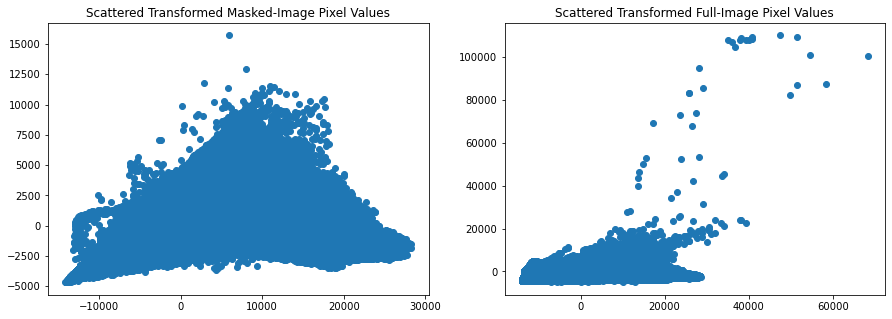

In [39]:
#Show transformed masked pixels vs unmasked pixels
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.title("Scattered Transformed Masked-Image Pixel Values")
plt.scatter(mRx_df[:,0],mRx_df[:,1])

plt.subplot(1, 2, 2)
plt.title("Scattered Transformed Full-Image Pixel Values")
plt.scatter(rx_df[:,0],rx_df[:,1])

## Through indexing get according pixel dependant variables

In [35]:
#Get sizes of images
from tqdm.notebook import tqdm
import os

sizes = []
for file in tqdm(os.listdir('D:/datasets/soilHyperspec/train_data/train_data/train_data')):
    if file == '.DS_Store':
        continue
    with np.load('D:/datasets/soilHyperspec/train_data/train_data/train_data/' + file) as npz:
        arr = np.ma.MaskedArray(**npz)
        sizes.append(arr.shape[1:3])
        del(arr)
        
sizeIndexing = [i[0]*i[1] for i in sizes]

  0%|          | 0/1733 [00:00<?, ?it/s]

In [50]:
#adds corresponding pixel 'y' values to dataframe
def expandDataframe(pcaDF, GT_DATAFRAME, indexing):
    pH = list(GT_DATAFRAME['pH'].values)
    P = list(GT_DATAFRAME['P'].values)
    K = list(GT_DATAFRAME['K'].values)
    Mg = list(GT_DATAFRAME['Mg'].values)
    
    pHExpanded = []
    PExpanded = []
    KExpanded = []
    MgExpanded = []
    
    for i in range(0,len(indexing)): #[121,...]
        for j in range(0,indexing[i]):#[0,1,...,121]
            #add pH value to list
            pHExpanded.append(pH[i])
            PExpanded.append(P[i])
            KExpanded.append(K[i])
            MgExpanded.append(Mg[i])
        
    #add extra column to dataframe
    expandedDF = pd.DataFrame({'PCA1':pcaDF[:,0],
                              'PCA2':pcaDF[:,1],
                              'pH': pHExpanded,
                              'P': PExpanded,
                              'K': KExpanded,
                              'Mg': MgExpanded})
    
    return expandedDF

## Full Image pixels

In [51]:
expandedDF = expandDataframe(rx_df, gt_df,sizeIndexing)

Text(0.5, 1.0, 'PCA transformed full image pixels (Coloured by Mg)')

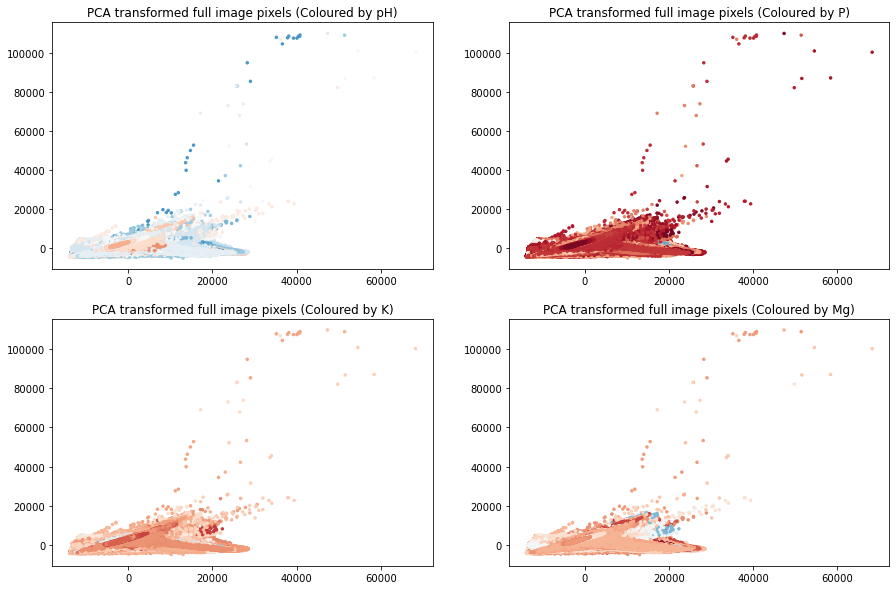

In [53]:
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
plt.scatter(expandedDF['PCA1'], expandedDF['PCA2'], s = 6, c=expandedDF['pH'], cmap='RdBu')
plt.title("PCA transformed full image pixels (Coloured by pH)")

plt.subplot(2, 2, 2)
plt.scatter(expandedDF['PCA1'], expandedDF['PCA2'], s = 6, c=expandedDF['P'], cmap='RdBu')
plt.title("PCA transformed full image pixels (Coloured by P)")

plt.subplot(2, 2, 3)
plt.scatter(expandedDF['PCA1'], expandedDF['PCA2'], s = 6, c=expandedDF['K'], cmap='RdBu')
plt.title("PCA transformed full image pixels (Coloured by K)")

plt.subplot(2, 2, 4)
plt.scatter(expandedDF['PCA1'], expandedDF['PCA2'], s = 6, c=expandedDF['Mg'], cmap='RdBu')
plt.title("PCA transformed full image pixels (Coloured by Mg)")

#need to create colormap legend
#can refactor this code as a loop i=4

## Masked Image Pixels

# Treating data as Images (Averaged PCA1 & PCA2 Value)